In [5]:
import scvelo as scv
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
path_to_write='/media/sergio/Meninges/SpatialData_formatted/'

In [6]:
adata=sc.read(path_to_write+'adata_for_velocity_processed.h5ad')

In [18]:
clusters=['7','1','10','18','5','14']
adata=adata[adata.obs['leiden'].isin(clusters)]

In [19]:
sc.tl.umap(adata)

2024-07-12 16:30:44.828777: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-12 16:30:44.845508: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-12 16:30:45.084431: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-12 16:30:45.086384: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-12 16:30:46.143757: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

/home/sergio/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


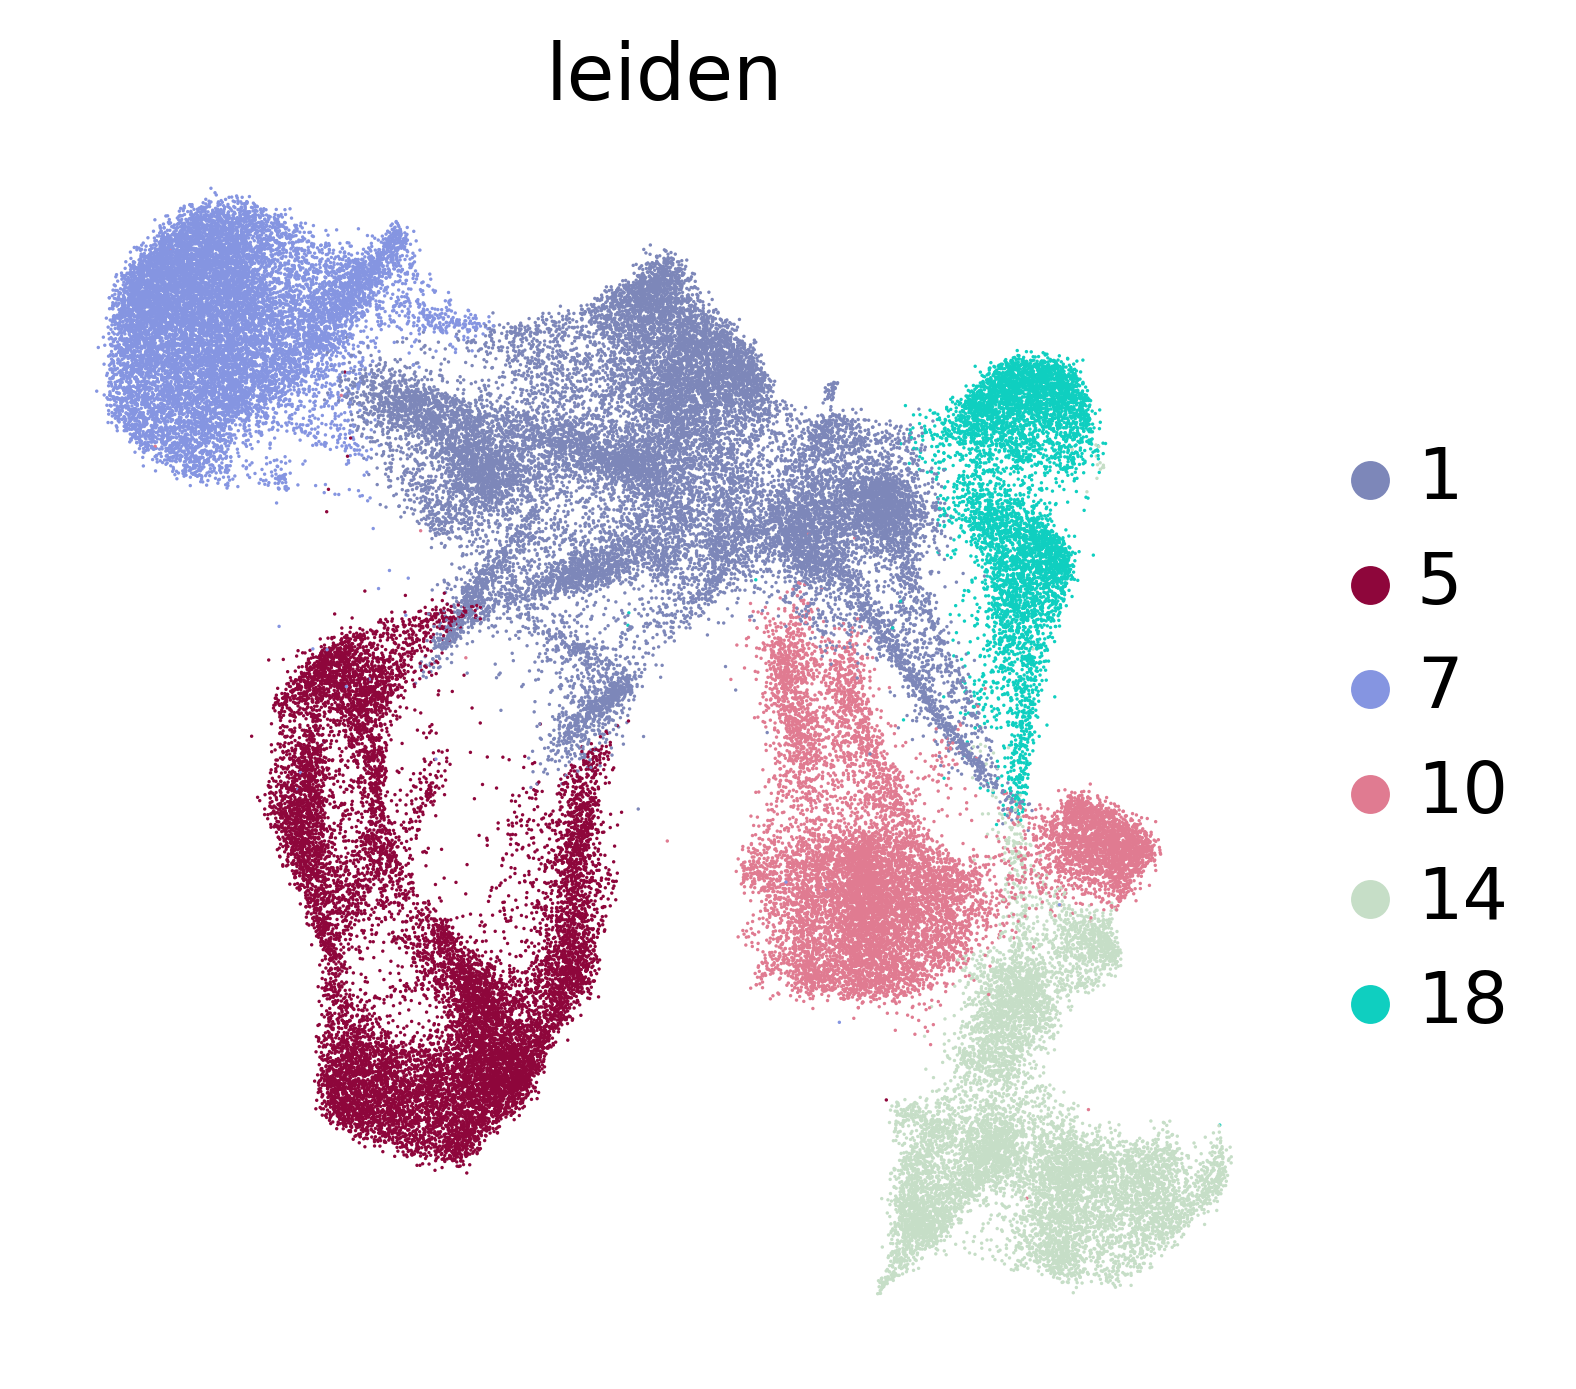

In [20]:
sc.pl.umap(adata,color='leiden')

In [23]:
sc.pp.neighbors(adata)

In [24]:
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)
scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata)

computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:08) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/32 cores)


  0%|          | 0/79602 [00:00<?, ?cells/s]

    finished (0:01:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:18) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


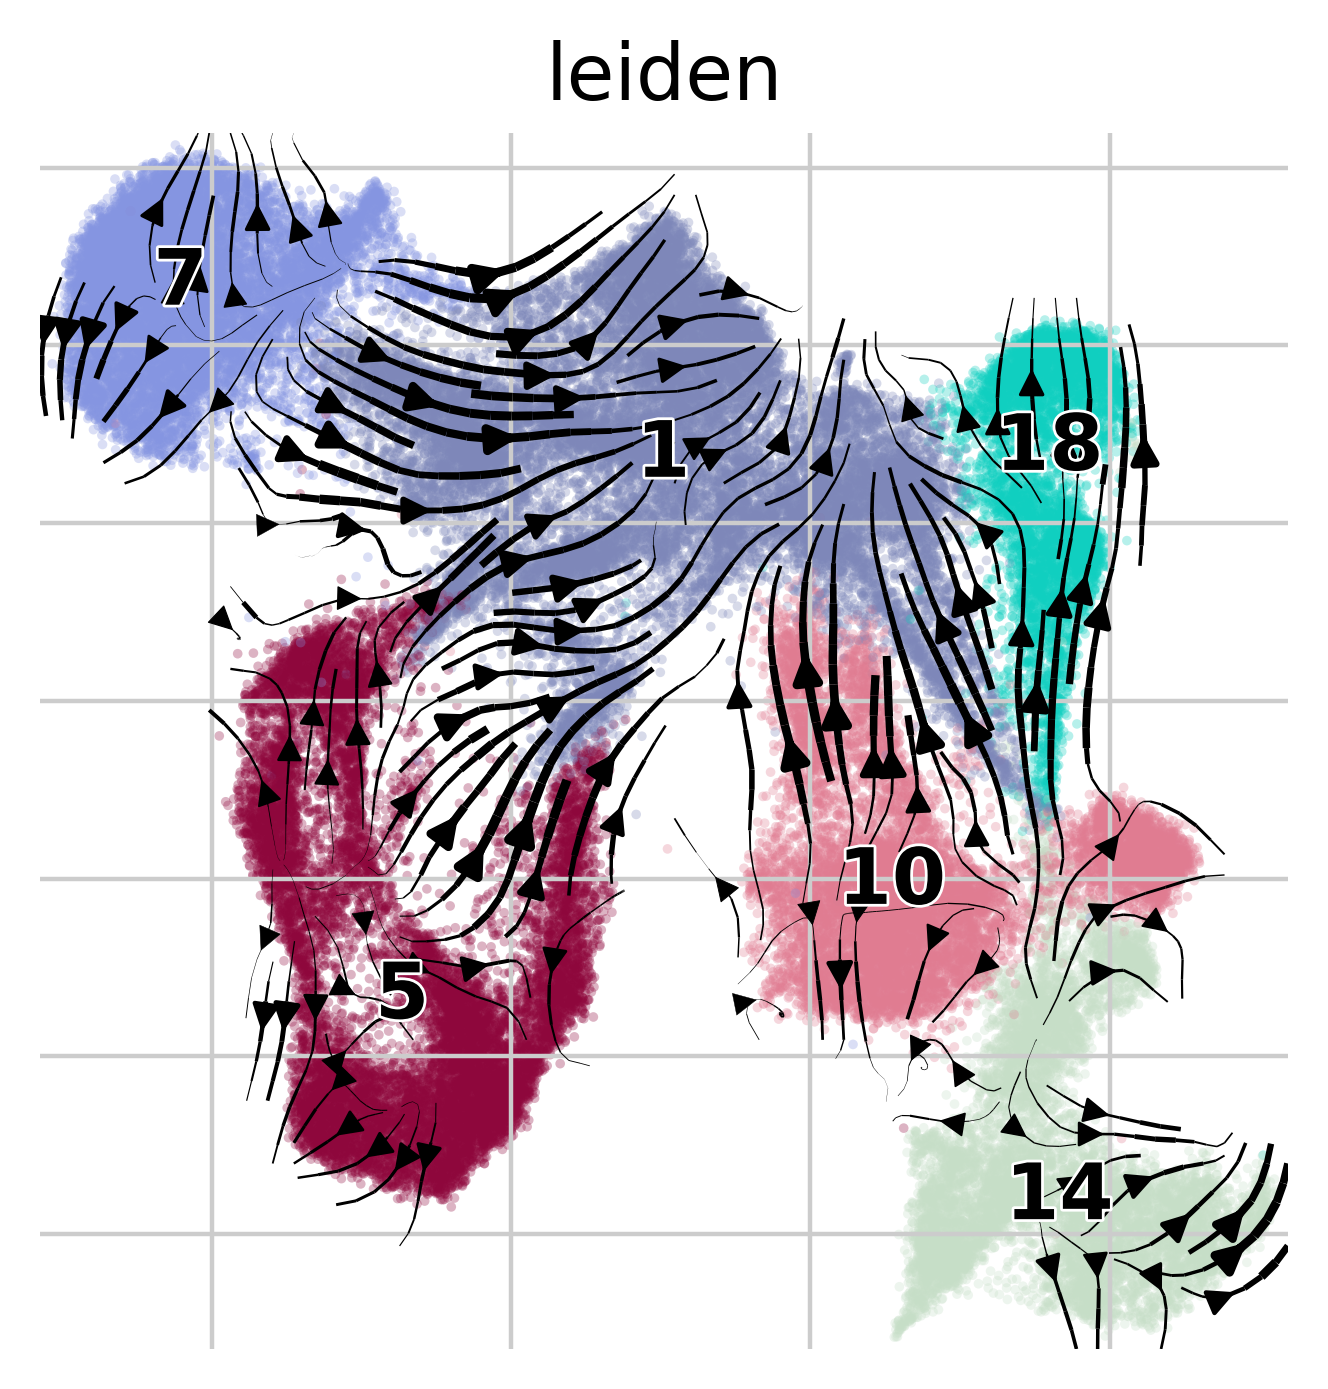

In [25]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color='leiden')

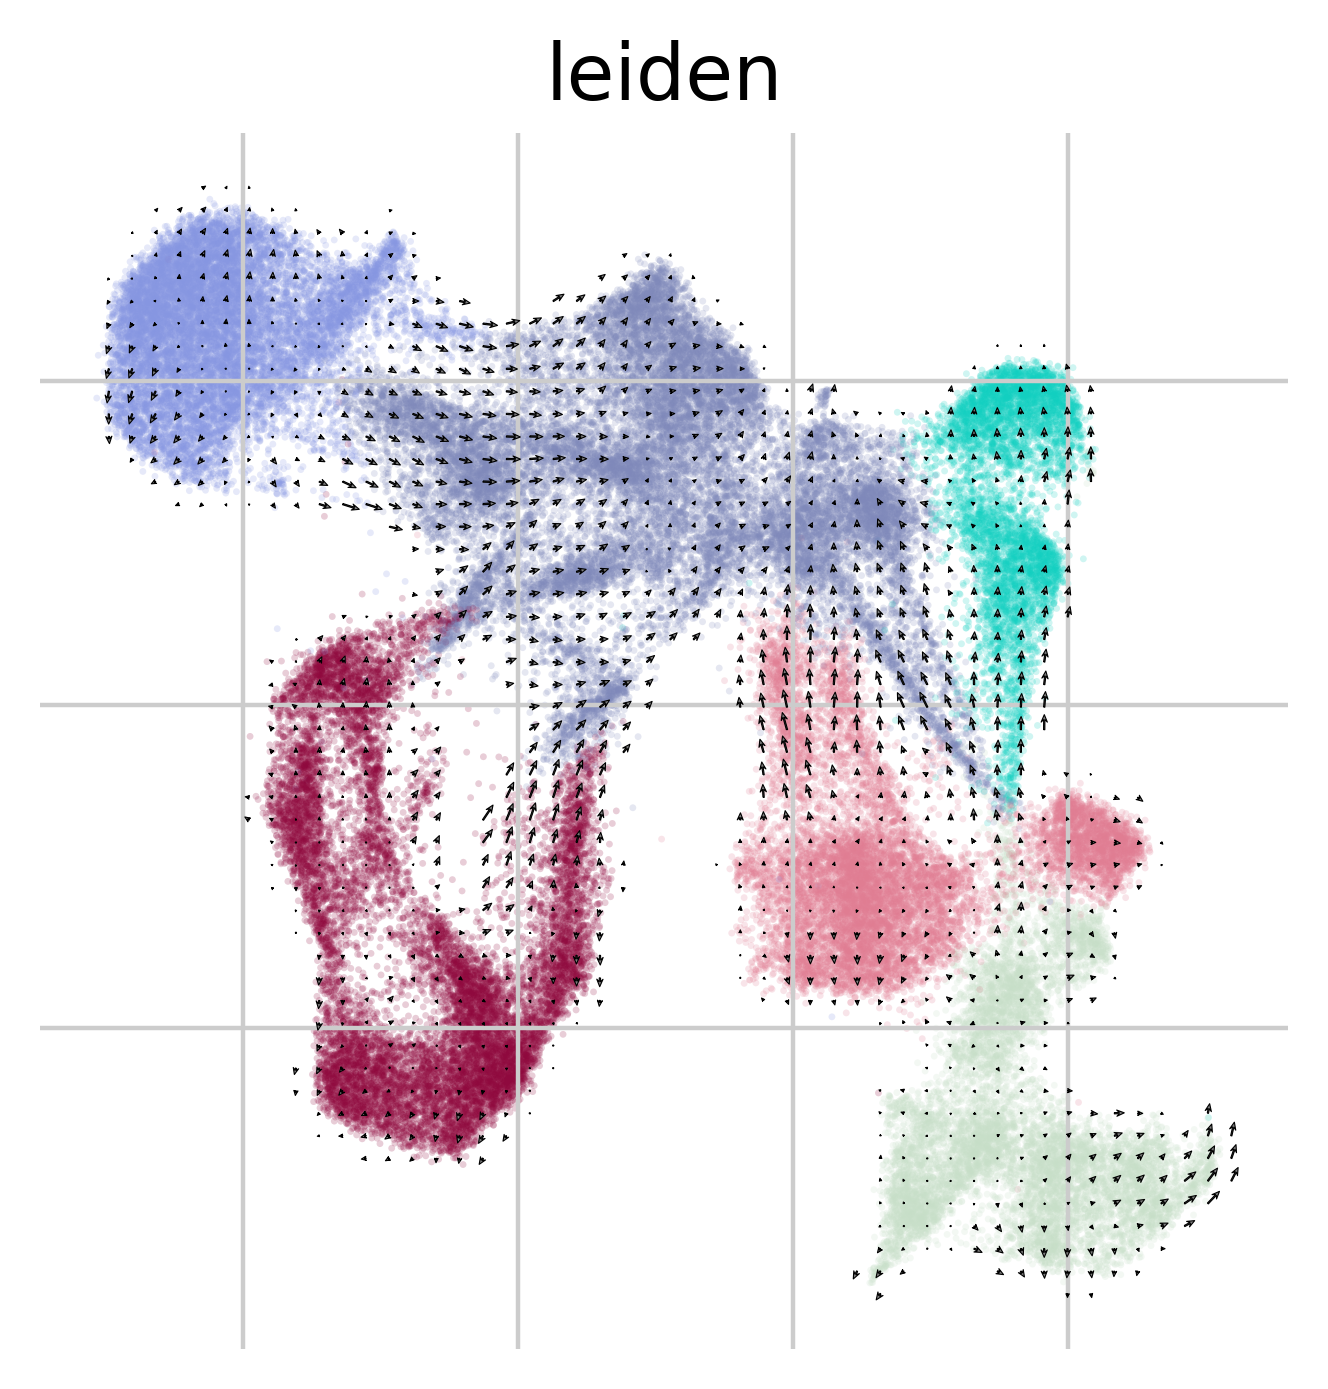

In [26]:
scv.pl.velocity_embedding_grid(adata, basis='umap', color='leiden')

/home/sergio/.local/lib/python3.8/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)
/home/sergio/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


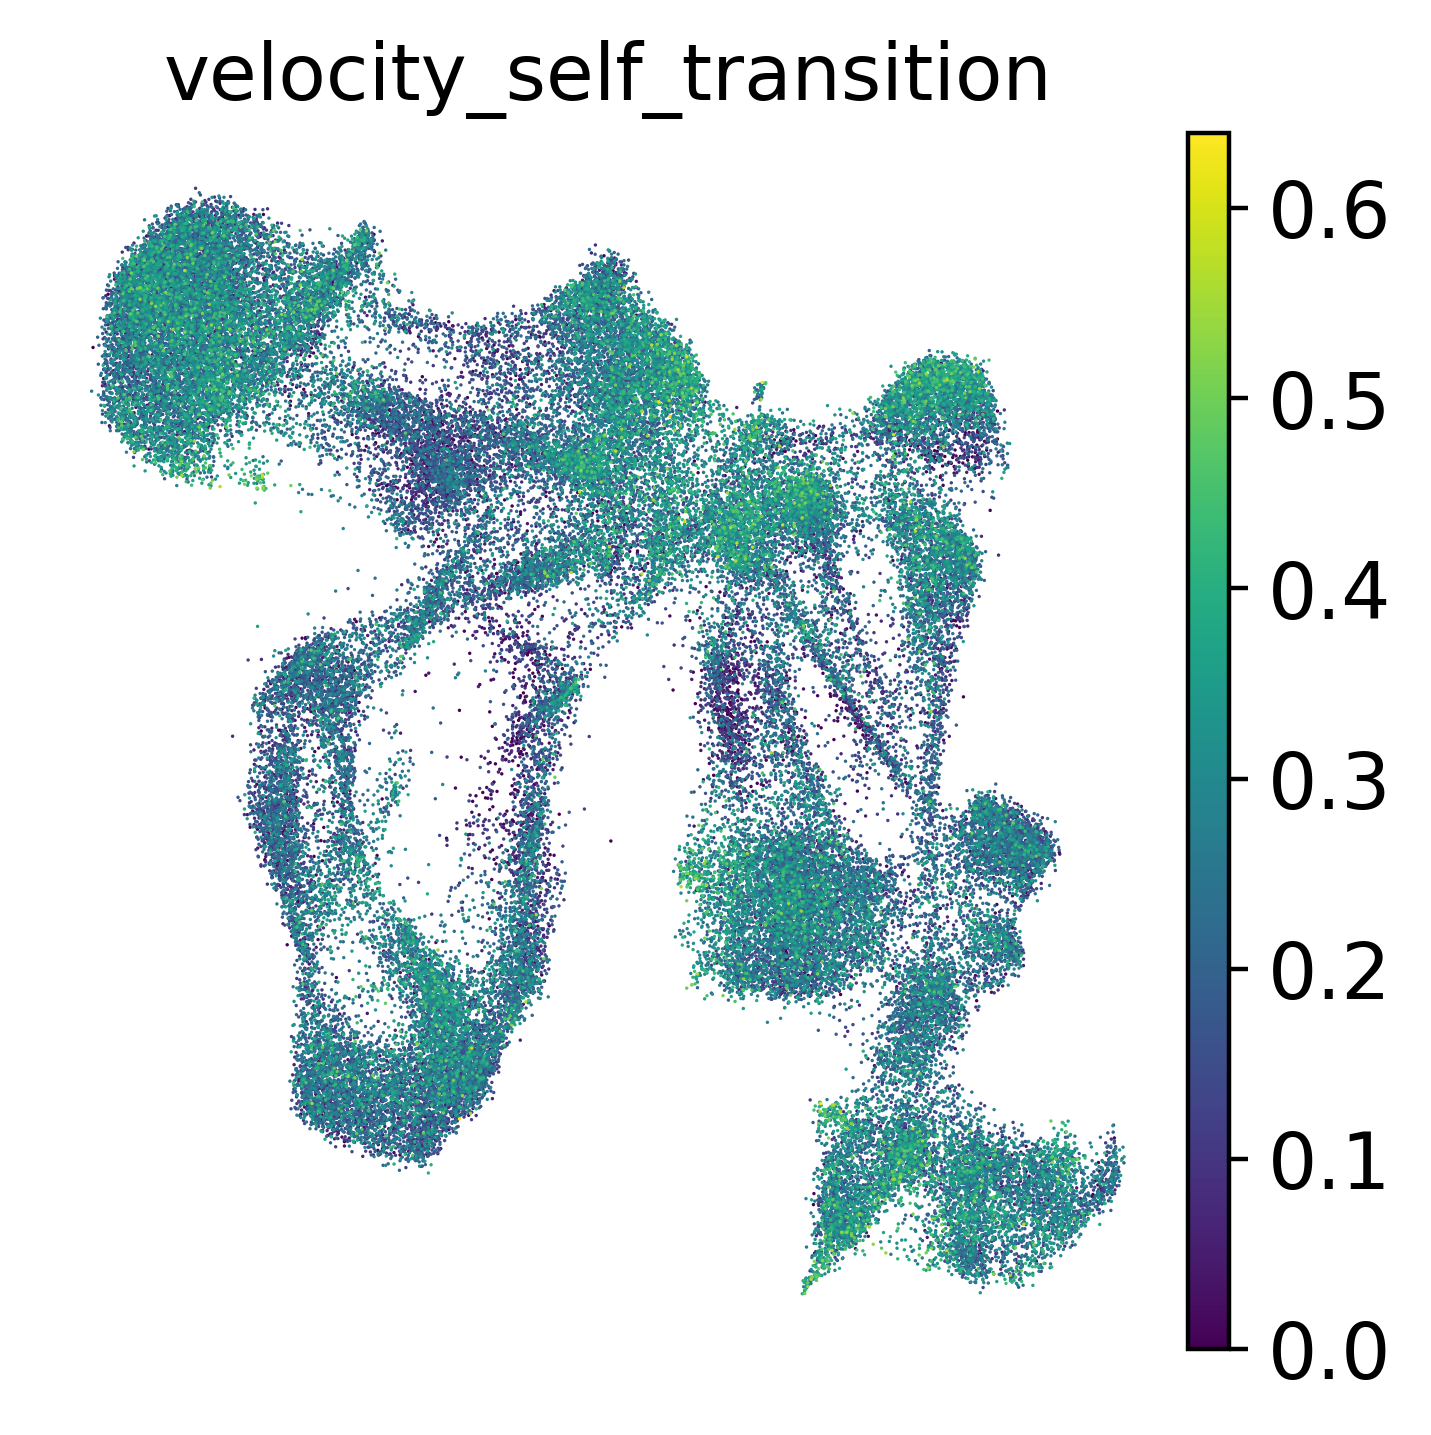

In [27]:
sc.set_figure_params(scanpy=True, dpi=200, dpi_save=200, frameon=False, vector_friendly=True, fontsize=14, format='pdf', ipython_format='png2x')
sc.pl.umap(adata,color='velocity_self_transition')

Renamed 'spatial' to convention 'X_spatial' (adata.obsm).
computing velocity embedding
    finished (0:00:19) --> added
    'velocity_spatial', embedded velocity vectors (adata.obsm)


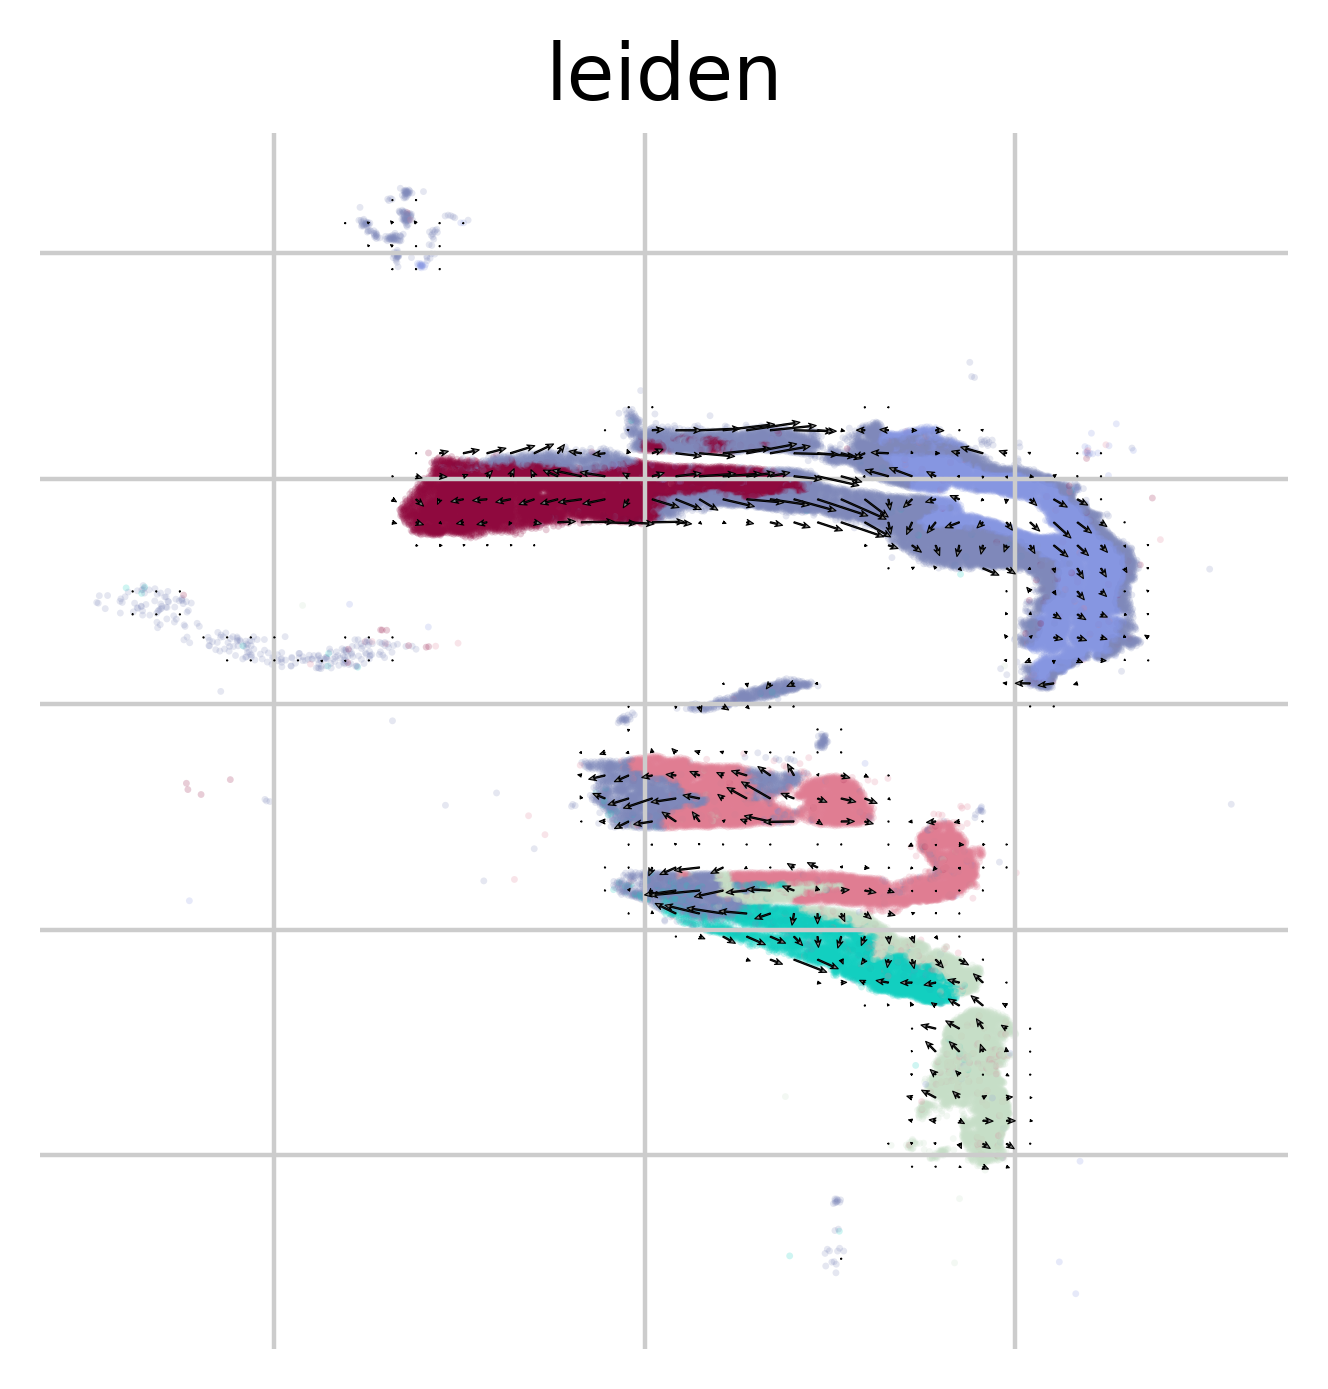

In [28]:
scv.pl.velocity_embedding_grid(adata, basis='spatial', color='leiden')

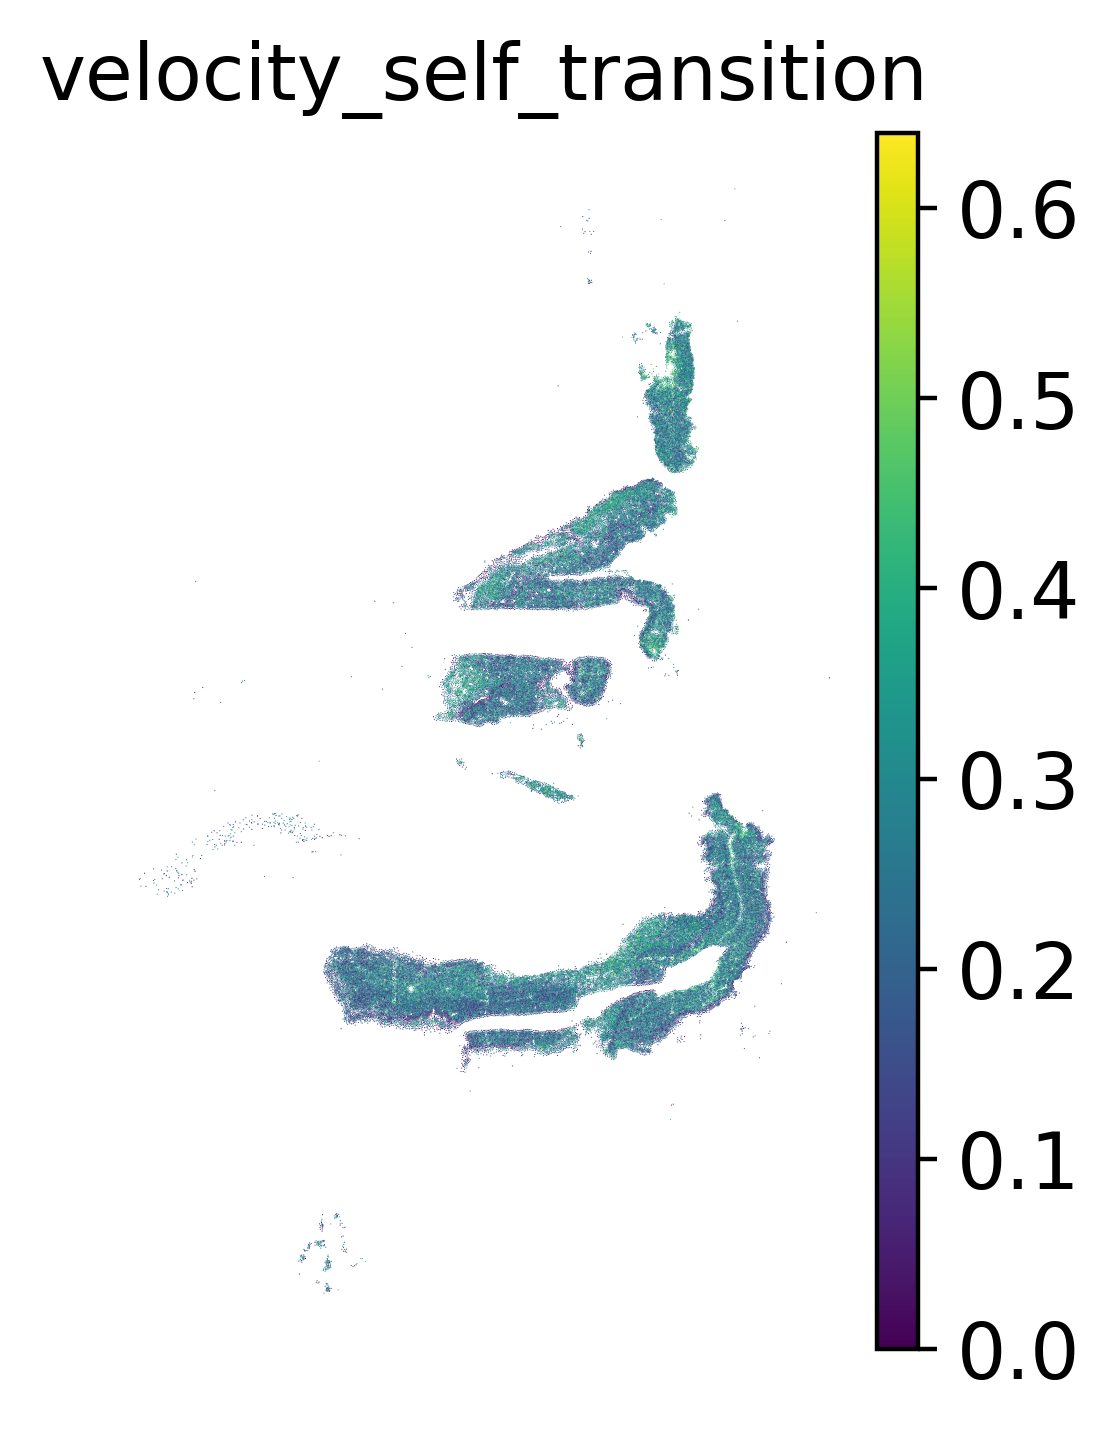

In [32]:
sc.pl.spatial(adata,color='velocity_self_transition',spot_size=10)